In [3]:
import math as m
from math import *

import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

import statistics as stats

import cv2

from skimage import io, color

from skimage import exposure

I was able to get the attepmt to run, but it is very very slow and I could not process the whole image so I did part. I learned that for loops are very bad for image analysis becuas they take a long time

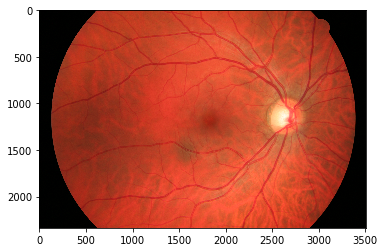

In [4]:
#image1 = io.imread('Pictures\Halloween.jpg')
image1 = io.imread('Pictures\eye.jpg')
plt.imshow(image1)

In [ ]:
image = image1[0:500,200:850]
plt.imshow(image)
#print(image)
height = image.shape[0]
width = image.shape[1]
#print(height, width)

(1250, 1500, 3)


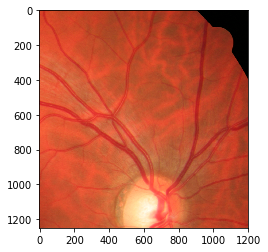

In [325]:
print(image.shape)


In [5]:
k = 4
N = int(image.size/3)
print(N)
d = 3
colors = itertools.cycle(["r", "b", "g"])
data = np.array(image)
#data = np.random.randint(0,250, size = (N,d)) #np.array(image) np.random.randint(0,200, size = (N,d))
#centroids = np.random.randint(0,250, size = (k,d))
pixels_col = [[255, 0, 0],[8, 6, 8], [300, 160, 100], [120, 120, 120]]
centroids = np.array([255, 0, 0,8, 6, 8,300, 160, 100, 120, 120,120]).reshape((k,d))
#centroids = centroids.reshape((k,d))
print(centroids)

NameError: name 'image' is not defined

In [328]:
#print(data)
datatest = image.flatten()
print(len(datatest))
re = datatest.reshape(N,d)
data = re
#print(data)
#print(data[55])
#plt.imshow(data)

4500000


In [329]:
prev_cluster = [0]*(N)
current_cluster = [1]*(N)
# new way to calculate distance
# can pre define these
loop = 0
#while (current_cluster != prev_cluster):
while (loop<4):
    prev_cluster = current_cluster
#for p in range(0,1):
    
    current_cluster = []
    new_centroid = np.zeros([k,d])
    # counter number of elements in each cluster
    counter = np.zeros([1,k]) + 0.00001
    #print(counter)

    dist2 = np.empty([len(data),k])
    for i in range (0,len(data)):
        for j in range (0, k):
            #print(data[i,:])
            #print(centroids[j,:])
            diff = (data[i,:] - centroids[j,:])
            #print(diff)
            dist2[i] [j] = np.sqrt(np.sum(np.square(diff)))
        #print(dist2[i])
        cluster = dist2[i].argmin()  
        #print(cluster)
        current_cluster.append(cluster)
        # calculate new centroid locations
        temp = data[i,:]
        new_centroid[cluster,:] = temp + new_centroid[cluster,:]
        counter[0, cluster] = 1 + counter[0,cluster]
    loop = loop +1
    print(loop)
    #print('HERE!!!!!!')
    Avg = np.transpose(new_centroid)/ counter
    #print(new_centroid)
    #print(dist2)
    #print(current_cluster)
    #print (counter)
    #print(Avg)
    Avg = np.transpose(Avg)
    #print(Avg)
    centroids = Avg

1
2
3
4


In [330]:
#print(current_cluster)
location = np.arange(N)
#print(location)
plotting = np.array([data[:,0], data[:,1], data[:,2], current_cluster, location])
#print(plotting)
plotting = np.transpose(plotting)
#print(plotting)
sort = plotting[np.argsort(plotting[:,d])]
#print(sort)

In [331]:
#print(sort)
start = 0
#colors = itertools.cycle(["r", "b", "g"])
#pixels_col = [[255, 0, 0],[0, 255, 0], [0, 0, 255]]
plotdata = sort[:N,:d]
plot = np.empty([N,d])
print(plotdata)
for l in range (0, k):
    print(l)
    print(start)
    end = start + np.count_nonzero(sort[:,d] ==l)
    #print(plotdata[start:end,:d])
    plot[start:end] = pixels_col[l]
    #plt.scatter(plot[:,0], plot[:,1], c = next(colors),s = 7)
    print(end)
    start = end
    
#print(plot)   
#plt.scatter(centroids[:,0], centroids[:,1],marker = '*', s = 200, c ='black')
#print(plot.shape)
# need to reshape image again
newimage = np.array([plot[:,0], plot[:,1], plot[:,2], sort[:,4], sort[:,3]])
#print(newimage)
newimage = np.transpose(newimage)
#print(newimage)
sort2 = newimage[np.argsort(newimage[:,d])]
sort2 =sort2.astype(int)
#newimage = plot.reshape(height,width)

#print(sort2)

print(sort2[1,0], sort2[1,1], sort2[1,2], sort)

[[211  66  37]
 [217  82  52]
 [219  86  55]
 ...
 [187  72  41]
 [189  76  42]
 [171  55  32]]
0
0
769369
1
769369
814807
2
814807
943238
3
943238
1500000
255 0 0 [[    211      66      37       0       0]
 [    217      82      52       0  696193]
 [    219      86      55       0  696194]
 ...
 [    187      72      41       3  551664]
 [    189      76      42       3  551639]
 [    171      55      32       3 1499999]]


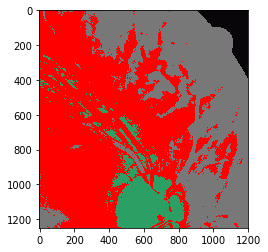

In [332]:
pixel_loc = 0;
image2 = image
for i in range (0,height):
        for j in range (0, width):
                image2[i][j] = sort2[pixel_loc,0], sort2[pixel_loc,1],sort2[pixel_loc,2]
                pixel_loc = pixel_loc +1
                
plt.imshow(image2)

In [ ]:
print(sort2.size)